<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2003%EC%9D%BC/11%EC%9B%94_3%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 웹 크롤링 했던거 좀 다른 느낌으로 했었음

# 크롤링에 필요한 라이브러리 불러오기
import requests

url = 'https://finance.naver.com/item/sise_day.naver?code=006740&page=1'
page = requests.get(url)
page.text
# 위와 같이 실행하면 에러 발생하는 경우 있음 --> 이는 웹사이트에서 막아놓은 거라 볼 수 있음 but 다 방법이 있다 이말이지

# 헤더 정보 설정
my_header = {'User-agent':'Mozilla/5.0'}

# 요청 헤더 설정하여 http 응답 받아오기
page = requests.get(url,headers=my_header)

# 응답 확인
page.text

'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버페이 증권</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20231101165823/css/world.css">\n</head>\n<body>\n<scri

In [ ]:
# 페이지 번호 일일이 클릭 안하고 데이터 가져올 수 있어야 함
# 페이지 번호 증가용 반복문 작성 ㄱㄱ(1~2페이지 읽어오는)
import pandas as pd
data = pd.DataFrame()

for i in range(1,3):
    full_url = url + str(i)
    page = requests.get(full_url, headers=my_header)
    dat = pd.read_html(page.text)[0]
    data = pd.concat([data,dat])
data

# 100일치 데이터 원하므로 1~10페이지 까지 가져오기
data = pd.DataFrame()
url = 'https://finance.naver.com/item/sise_day.naver?code=006740&page='

for i in range(1,11):
    full_url = url + str(i)
    page = requests.get(full_url, headers=my_header)
    dat = pd.read_html(page.text)[0]
    data = pd.concat([data,dat])
data

# 위 데이터에서 결측치 제거
data.isnull().sum()
data.dropna(inplace=True)
data

# 컬림 이름 변경
data.rename(columns={'날짜':'date', '종가':'end_price','시가':'start_price','고가':'highest_price','저가':'lowest_price'}, inplace=True)

# 필요없는 컬럼 변경
data.drop(['전일비','거래량'],axis=1,inplace=True)
data

# 중앙값 추가하기
data['median'] = data['highest_price'] - ((data['highest_price'] - data['lowest_price'])/2)
data

# 일일시세를 월별로 집계하려면 월 정보가 필요
#  data열에 있는 일자 정보를 문자열로 변경해 month컬럼 추가
data.dtypes
data['month'] = data['date'].str[0:7]
data

# 그래프 x축을 숫자로 설정하기 위해서 set_index()를 사용해 색인을 'date'로 변경
# 날짜를 증가하는 형태로
data.set_index('date',inplace=True)
data.sort_index(inplace=True)
data

,end_price,start_price,highest_price,lowest_price,median,month
date,,,,,,
2023.06.09,22050.0,20450.0,22200.0,20400.0,21300.0,2023.06
2023.06.12,21950.0,21950.0,22300.0,21400.0,21850.0,2023.06
2023.06.13,22400.0,21750.0,22450.0,21700.0,22075.0,2023.06
2023.06.14,22750.0,22400.0,23250.0,22300.0,22775.0,2023.06
2023.06.15,22750.0,22750.0,23000.0,22000.0,22500.0,2023.06
...,...,...,...,...,...,...
2023.10.30,11660.0,11660.0,11660.0,11660.0,11660.0,2023.10
2023.10.31,8170.0,8170.0,8170.0,8170.0,8170.0,2023.10
2023.11.01,5720.0,5720.0,5720.0,5720.0,5720.0,2023.11


<Axes: xlabel='date'>

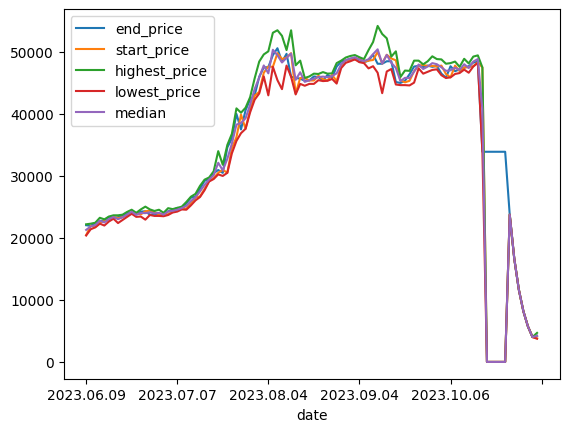

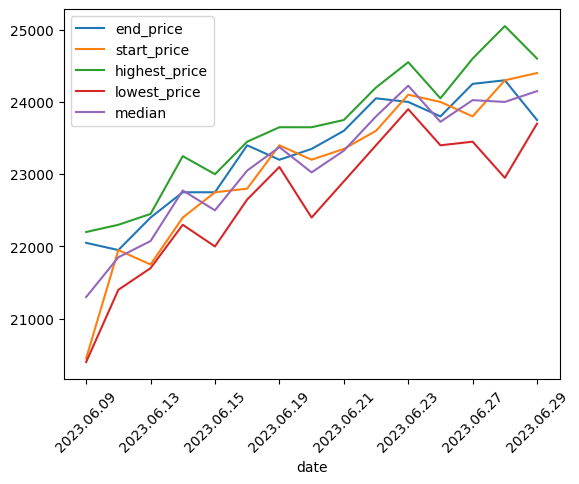

In [ ]:
# 막대 그래프로 그리기
data.plot.line()
data[:15].plot.line(rot=45)

<Axes: title={'center': 'median'}, xlabel='[month]'>

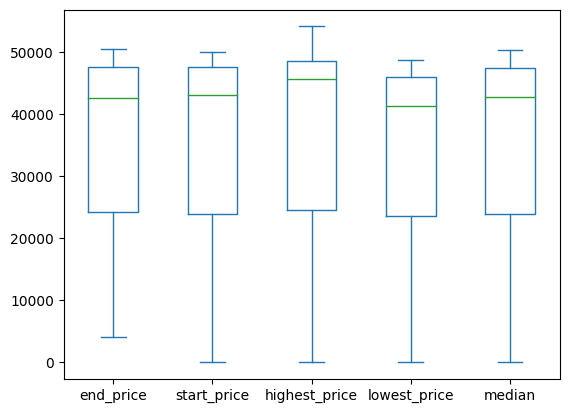

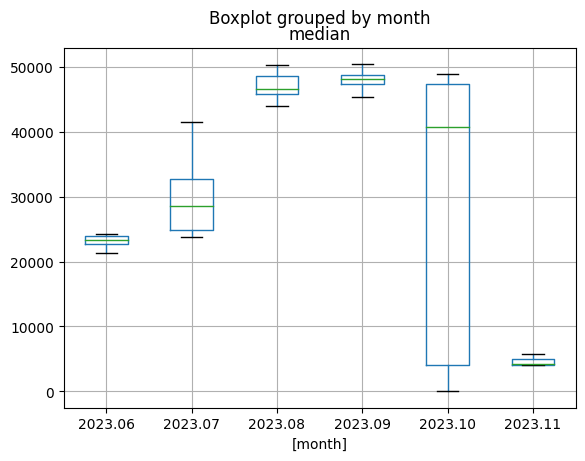

In [ ]:
# boxplot
data.plot.box()
data.boxplot(column=['median'], by=['month'])